In [139]:
import epispot as epi

In [140]:
def place(t): return 0.25
def N(t): return 1e6
def R_0(t): return 2.5
def inf_to_hos(t): return 0.5
def inf_to_rec(t): return 0.5
def hos_to_dead(t): return 0.5
def hos_to_rec(t): return 0.5

In [141]:
class CustomInfected(epi.comps.Infected):
    def get_deriv(self, time, system):
        """
        Derivative of the Critical compartment

        :param time: time to take derivative at
        :param system: system of all states
        :return: derivative
        """

        derivative = 0

        if self.p_recovery:
            derivative -= self.p_recovery(time) * self.recovery_rate(time) * system[self.layer_index]

        return derivative

In [142]:
Susceptible = epi.comps.Susceptible(layer_index=0, R_0=R_0, gamma=place, N=N)

Infected = CustomInfected(layer_index=1, N=N, R_0=R_0, gamma=place,
                              recovery_rate=place, p_recovery=inf_to_rec,
                              p_hospitalized=None, hospital_rate=None)

Recovered = epi.comps.Recovered(layer_index=2, p_from_inf=inf_to_rec,
                                from_inf_rate=place, p_from_hos=None,
                                from_hos_rate=None)

In [ ]:
SIHRD_Model = epi.models.Model(init_pop=)
SIHRD_Model.add_layer(layer=Susceptible, layer_name='Susceptible', layer_map=[Infected])
SIHRD_Model.add_layer(layer=Infected, layer_name='Infected', layer_map=[Recovered])
SIHRD_Model.add_layer(layer=Recovered, layer_name='Recovered', layer_map=[])

TypeError: Model.__init__() missing 1 required positional argument: 'init_pop'

TypeError: unsupported operand type(s) for -: 'list' and 'int'

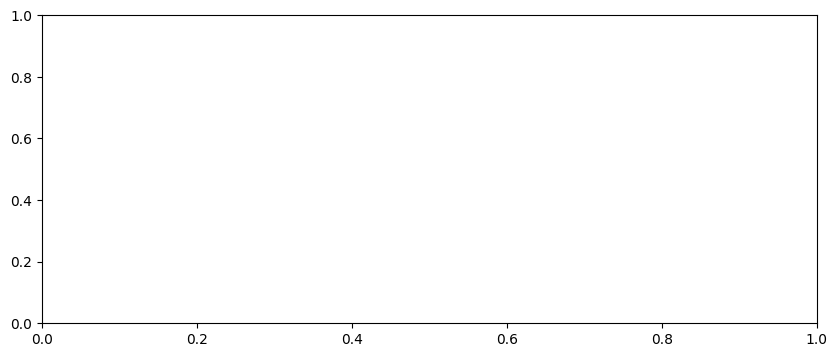

In [ ]:
Plot = epi.plots.plot_comp_nums(SIHRD_Model, range(100))
# Plot.show()  # uncomment for newer versions of epispot (>2.1.1)

KeyError: 0

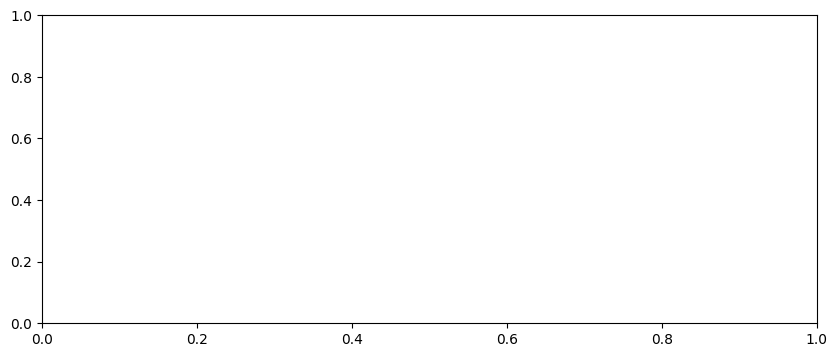

In [155]:
SIR_MODEL = epi.models.Model(init_pop=100, layers=[
    epi.comps.Susceptible(layer_index=0, R_0=2.5, gamma=0.125, N=100),
    epi.comps.Infected(layer_index=1, N=100),
    epi.comps.Recovered(layer_index=1)
])

# Manually define layer names and layer map (usually required by epispot)
SIR_MODEL.layer_names = ["Susceptible", "Infected", "Recovered"]
SIR_MODEL.layer_map = {
    "Susceptible": 0,
    "Infected": 1,
    "Recovered": 2
}

# Now run the plot
Plot = epi.plots.plot_comp_nums(SIR_MODEL, range(100))
